## 1. Introduction 
This assignment will help you to consolidate the concepts learnt in the session. 


### 2. Problem Statement 
I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman. 


### Dataset 
The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy. 


### Description of Variables
#The dataset contains 6366 observations of 9 variables:
#rate_marriage: woman's rating of her marriage (1 = very poor, 5 =very good) 
#age: woman's age
#yrs_married: number of years married
#children: number of children
#religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)
#educ: level of education (9 = grade school, 12 = high school, 14 =some college, 16 = college graduate, 17 = some graduate school, 20= advanced degree)
#occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 =teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =professional with advanced degree)
#occupation_husb: husband's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 =teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =professional with advanced degree)
#affairs: time spent in extra-marital affairs


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
data = sm.datasets.fair.load_pandas().data 
# add "affair" column: 1 represents having affairs, 0 represents not 
data['affair'] = (data.affairs > 0).astype(int) 
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)', data, return_type="dataframe") 
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2', 
'C(occupation)[T.3.0]':'occ_3', 
'C(occupation)[T.4.0]':'occ_4', 
'C(occupation)[T.5.0]':'occ_5', 
'C(occupation)[T.6.0]':'occ_6', 
'C(occupation_husb)[T.2.0]':'occ_husb_2', 
'C(occupation_husb)[T.3.0]':'occ_husb_3', 
'C(occupation_husb)[T.4.0]':'occ_husb_4', 
'C(occupation_husb)[T.5.0]':'occ_husb_5', 
'C(occupation_husb)[T.6.0]':'occ_husb_6'}) 
y = np.ravel(y) 


In [3]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [36]:
data['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [5]:
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


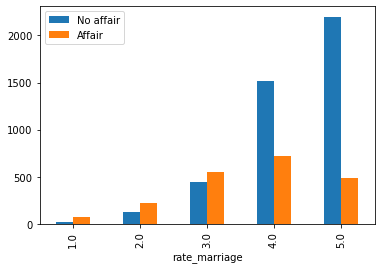

In [6]:
pd.crosstab(data.rate_marriage, data.affair).plot(kind='bar')
plt.legend(labels=['No affair','Affair'])

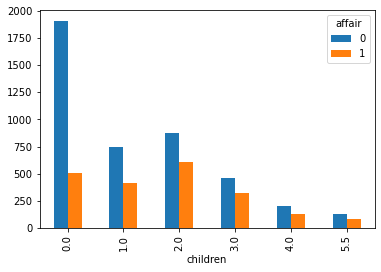

In [7]:
pd.crosstab(data.children, data.affair).sort_values(by='children').plot(kind='bar')

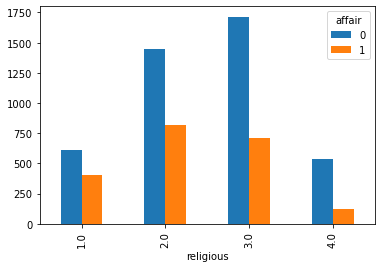

In [8]:
pd.crosstab(data.religious, data.affair).sort_values(by='religious').plot(kind='bar')

In [9]:
data['age'].value_counts()

27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64

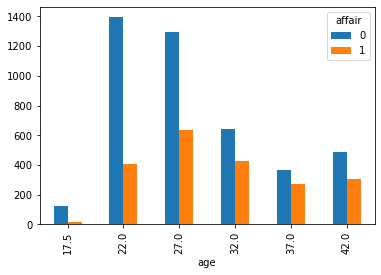

In [10]:
pd.crosstab(data.age, data.affair).plot(kind='bar')

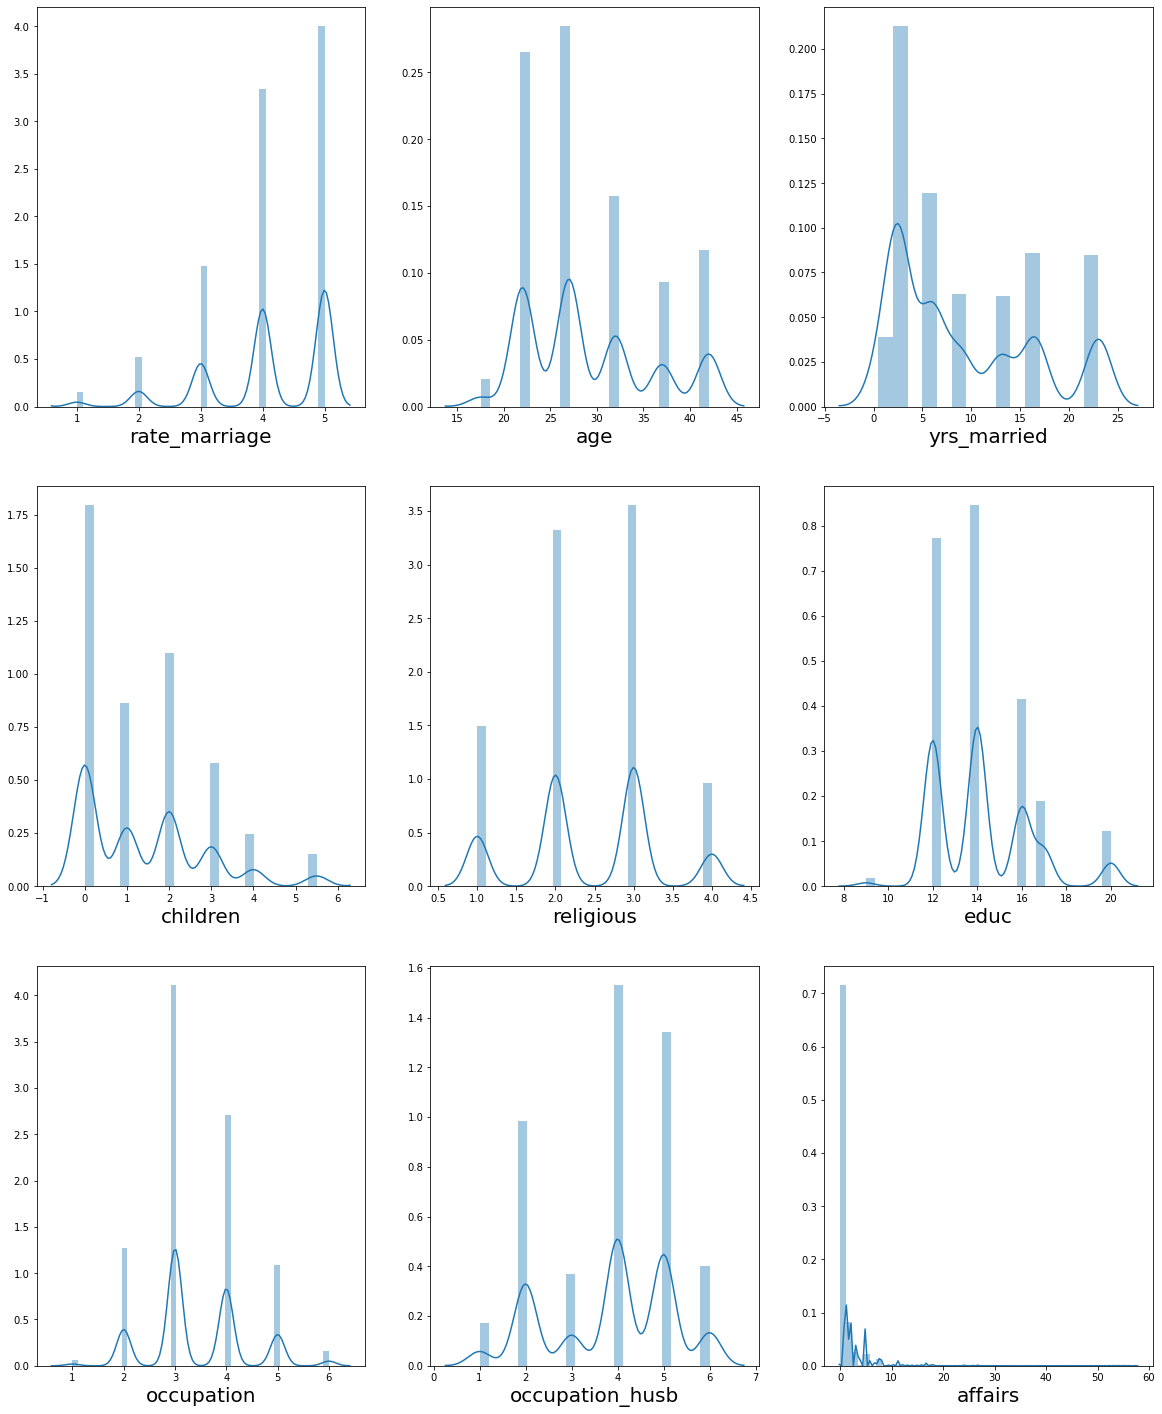

In [11]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

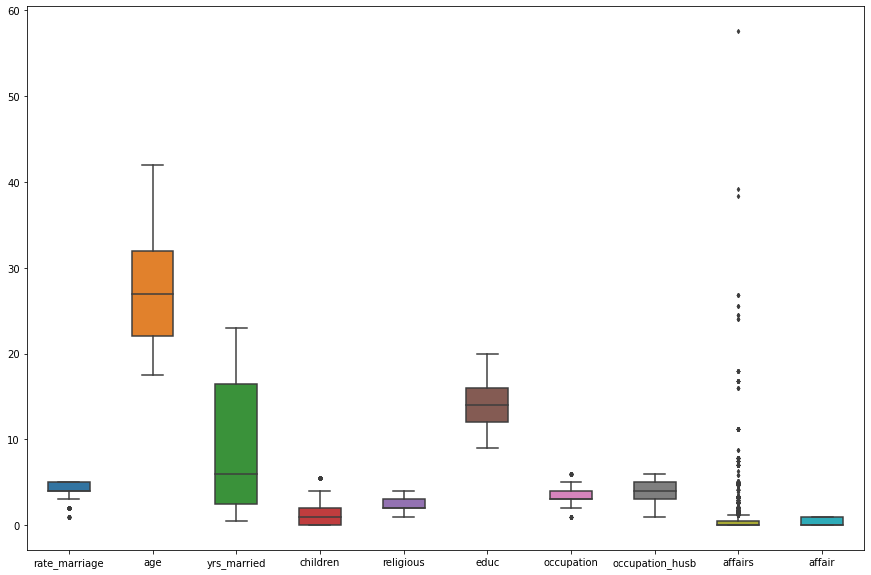

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [13]:
""""
#handling outliers
#for marriage rate
r=data['rate_marriage'].quantile(0.02)
data=data[data['rate_marriage']>r]
#for childern
c=data['children'].quantile(0.999)
data=data[data['children']<c]
#for occupation
o=data['occupation'].quantile(0.999)
data=data[data['occupation']<o]
oo=data['occupation'].quantile(0.01)
data=data[data['occupation']>oo]
"""

'"\n#handling outliers\n#for marriage rate\nr=data[\'rate_marriage\'].quantile(0.02)\ndata=data[data[\'rate_marriage\']>r]\n#for childern\nc=data[\'children\'].quantile(0.999)\ndata=data[data[\'children\']<c]\n#for occupation\no=data[\'occupation\'].quantile(0.999)\ndata=data[data[\'occupation\']<o]\noo=data[\'occupation\'].quantile(0.01)\ndata=data[data[\'occupation\']>oo]\n'

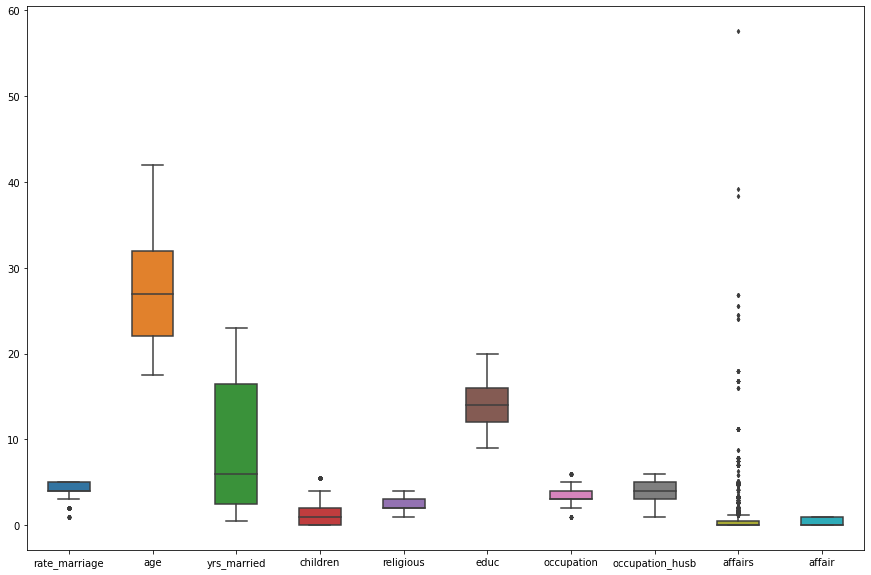

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

Now we have handaled the outliers. we are good to go for model training

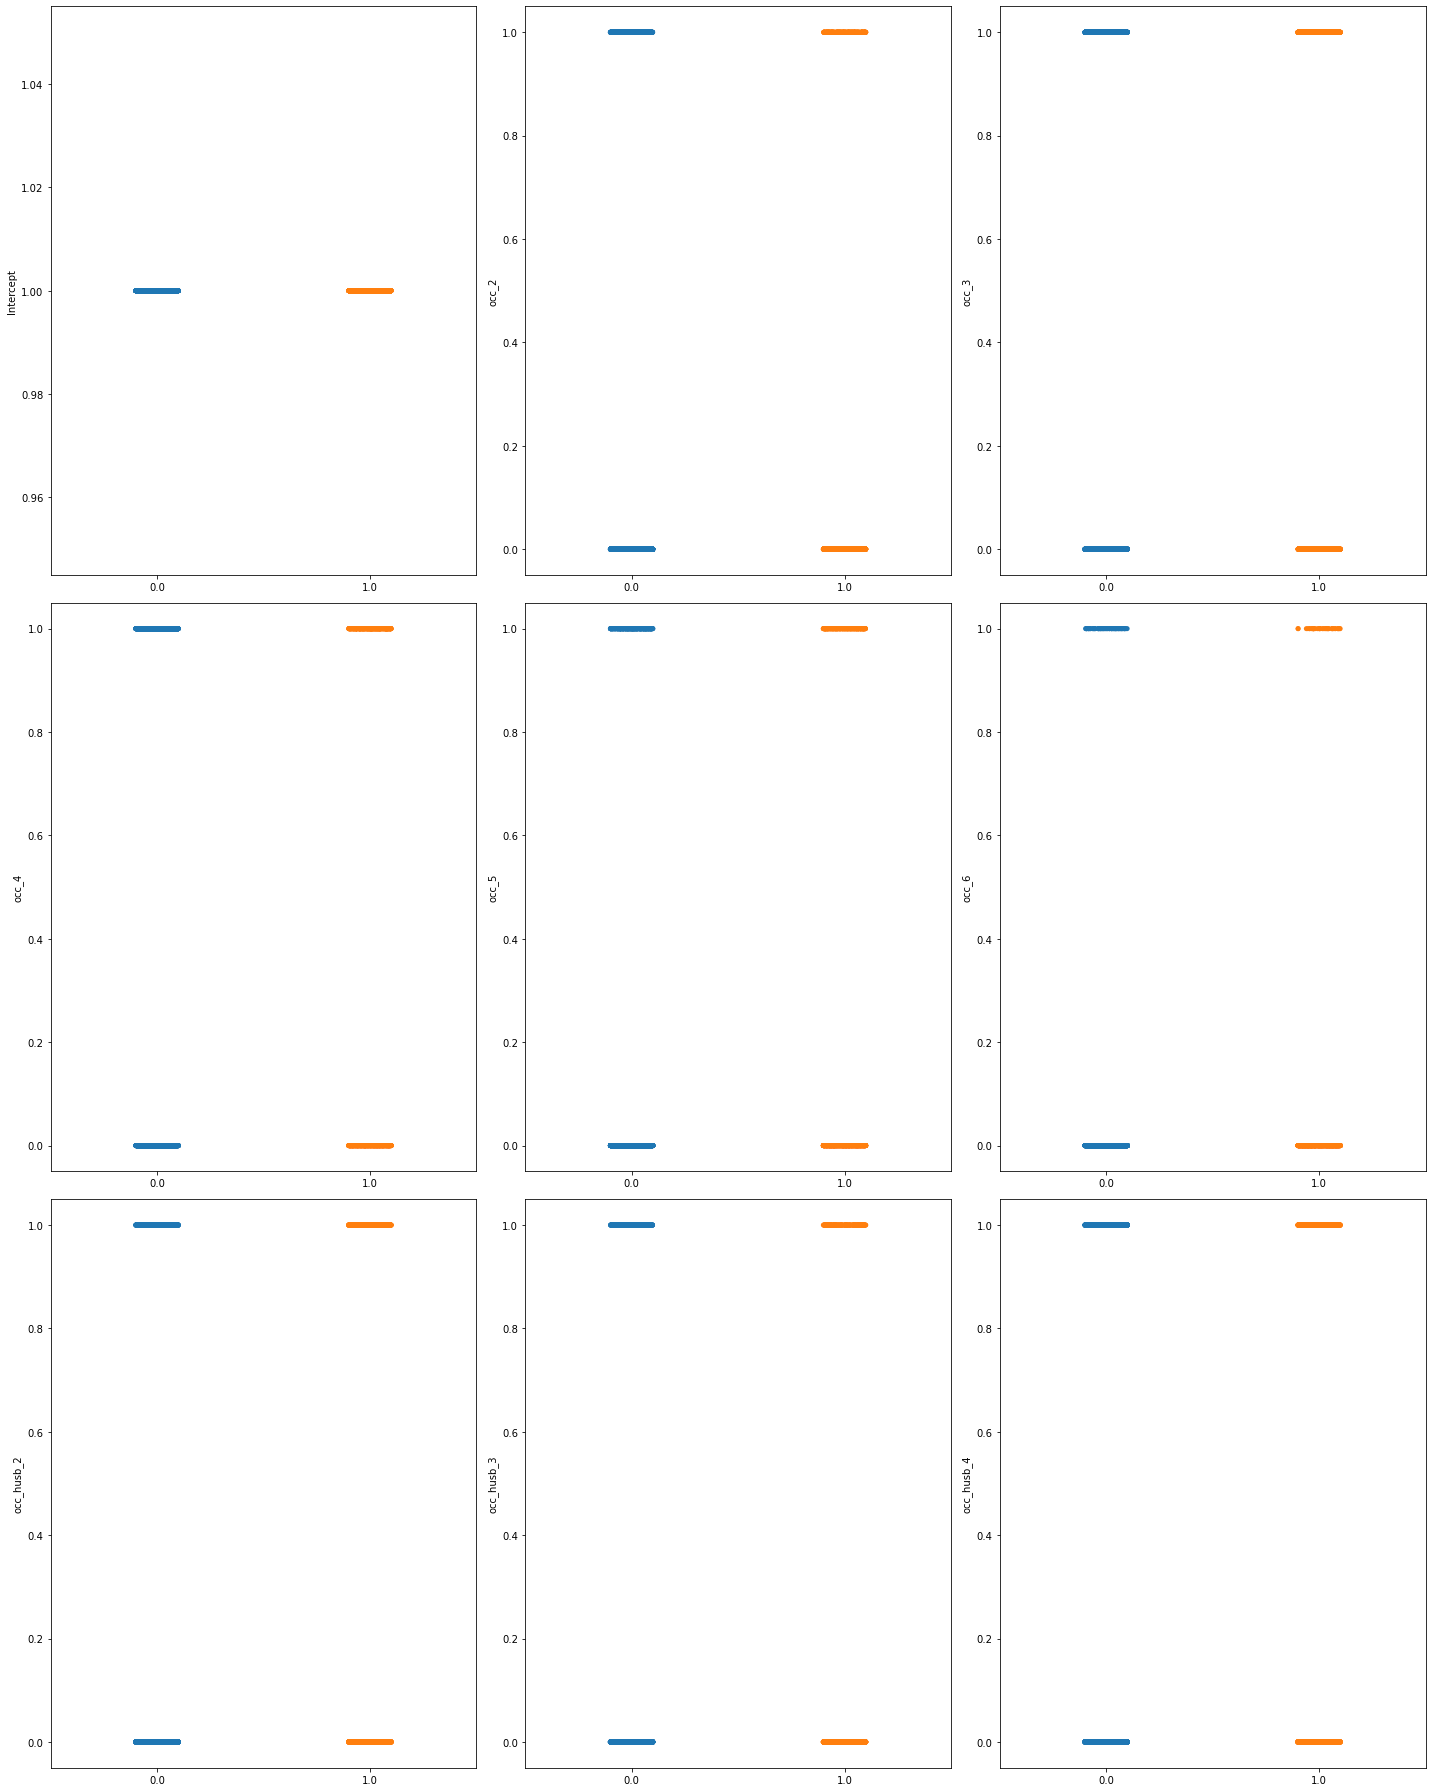

In [15]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [16]:
X=data.iloc[:,:8]
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [17]:
y=data.iloc[:,9]
y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affair, Length: 6366, dtype: int32

In [18]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
         1.28115287e+00, -1.51129246e+00,  8.54069123e-01],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -4.50087100e-01,  8.54069123e-01],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -9.63641611e-02, -4.50087100e-01, -2.11697133e+00],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -1.51129246e+00,  1.11309009e-01]])

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.034798,rate_marriage
1,5.454116,age
2,7.142949,yrs_married
3,2.528972,children
4,1.036906,religious
5,1.296242,educ
6,1.206863,occupation
7,1.082876,occupation_husb


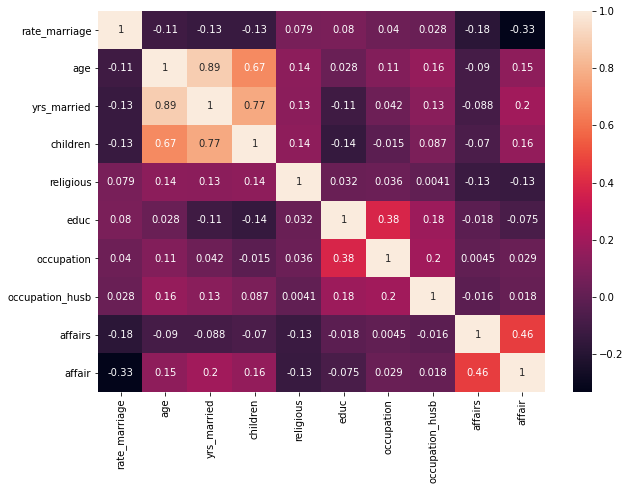

In [20]:
plt.figure(figsize=(10,7))
corrmat=data.corr()
sns.heatmap(corrmat,annot=True)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 2261)
# at 15 random state accuracy is good

In [22]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = log_reg.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7342964824120602

In [25]:
x_test.shape

(1592, 8)

In [26]:
v=pd.DataFrame(y_test)

In [27]:
v['affair'].value_counts()

0    1068
1     524
Name: affair, dtype: int64

In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[980,  88],
       [335, 189]], dtype=int64)

In [29]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [30]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7342964824120602

In [31]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9176029962546817

In [32]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7452471482889734

In [33]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8224926563155687

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.82      1068
           1       0.68      0.36      0.47       524

    accuracy                           0.73      1592
   macro avg       0.71      0.64      0.65      1592
weighted avg       0.72      0.73      0.71      1592



In [35]:
import pickle
# Writing different model files to file
with open( 'modelForAffairPrediction.pickle', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('standardScalarAffair.pickle', 'wb') as f:
    pickle.dump(scalar,f)